In [1]:
import sys
import os
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [3]:
import NbrRegionSegment as seg


In [4]:
img = cv.imread("1.jpg")

In [5]:
img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

In [6]:
# img = cv.medianBlur(img, 3)

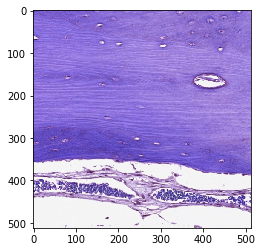

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [9]:
#LBP part
radius = 1
points = 8*radius 

lbp = local_binary_pattern(gray_img, points, radius, "uniform").astype("uint8")

print(lbp)

[[1 0 1 ... 4 4 1]
 [2 7 4 ... 1 3 5]
 [9 4 9 ... 5 0 1]
 ...
 [5 8 8 ... 8 8 5]
 [5 8 8 ... 8 8 5]
 [3 5 5 ... 5 5 3]]


In [18]:
# r1, r2 = seg.RegionExtract(img, lbp, 20, 0.2, True)
r = seg.SegmentImage(img, lbp, 16, 0.4, 0.4, 0.8, True)

# print(r1.shape, r2.shape)
# plt.imshow(r)
# plt.imshow(r2)

Time to segment =  0.30675601959228516


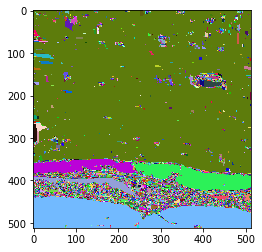

In [19]:
plt.imshow(r)

In [12]:
rmap = seg.GetBgMap(r[0], 1000, r[1], True)

Time to Get map =  0.0020036697387695312


In [14]:
newim = np.array(img)
newim[rmap] = 0

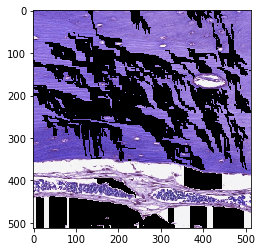

In [15]:
plt.imshow(newim)

In [16]:
r1, r2 = r

In [17]:
r2.shape

(43787,)

In [18]:
seg.GetAllSegVariance(gray_img, r1, r2.shape[0], True)

Time to Calculate =  4.42951774597168


(220.64035034179688, 0.8191288709640503)

In [14]:
res = []

for i in range(1, 25, 5):
    r1, r2 = seg.RegionExtract(img, lbp, i, 0.2, True)
    # res.append(seg.GetIntraSegVariance(gray_img, r1, r2.shape[0], True))

Time to segment =  0.8231818675994873
Time to segment =  0.6207122802734375
Time to segment =  0.5611639022827148
Time to segment =  0.49704504013061523
Time to segment =  0.4792349338531494
